## Credit Card Fraud Detection
* 2013년 9월 유럽의 신용카드 사용자들의 실제 거래기록
* kaggle에서 주최한 데이터분석 대회에서 사용한 데이터
    + V1 ~ V28 : 개인정보로 공개되지 않은 값
    + Time : 시간
    + Amount : 거래금액
    + Class : 사기 여부 (1: 사기, 0: 정상)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [5]:
fraud = pd.read_csv('data/creditcard.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fraud['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
fraud.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

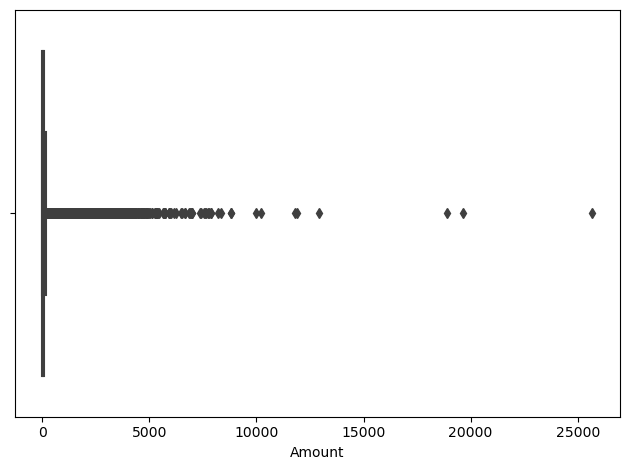

In [9]:
sns.boxplot(x='Amount', data=fraud)
plt.tight_layout()

In [11]:
data = fraud.loc[:, 'V1':'V28']
target = fraud['Class']

Xtrain, Xtest, ytrain, ytest= train_test_split(data, target, train_size=0.75,
                random_state=2309261410, stratify=target)

In [3]:
from sklearn.metrics import f1_score

In [12]:
# 분석1 - 로지스틱 회귀
lgclf = LogisticRegression()

lgclf.fit(Xtrain, ytrain)
pred = lgclf.predict(Xtest)

lgclf.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.9991760492497834, 0.9992135052386169)

In [13]:
confusion_matrix(pred, ytest)

array([[71071,    48],
       [    8,    75]])

In [14]:
# precision_score(Xtrain, ytrain)
recall_score(pred, ytest)

0.9036144578313253

In [15]:
# 분석2 - 의사결정 나무
dtclf = DecisionTreeClassifier()

dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

dtclf.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(1.0, 0.999115193393444)

In [16]:
confusion_matrix(ytest, pred)

array([[71048,    31],
       [   32,    91]])

In [17]:
# precision_score(Xtrain, ytrain)
recall_score(pred, ytest)

0.7459016393442623

In [18]:
# 분석 3 - 나이브 베이즈
nbclf = BernoulliNB()

nbclf.fit(Xtrain, ytrain)
pred = nbclf.predict(Xtest)

nbclf.score(Xtrain, ytrain), accuracy_score(pred, ytest)

(0.99917136771143, 0.9990871042948232)

In [19]:
confusion_matrix(ytest, pred)

array([[71061,    18],
       [   47,    76]])

In [22]:
# precision_score(Xtrain, ytrain)
recall_score(pred, ytest)

0.8085106382978723

In [21]:
# precision_score(Xtrain, ytrain)
f1_score(pred, ytest)

0.7004608294930876

In [ ]:
# 분석4 - 최근접 이웃
scores = []
for k in range(1, 30):
    knnclf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knnclf, Xtrain, ytrain, cv=5, scoring='accuracy') 
    scores.append(score.mean())

In [ ]:
plt.plot(scores, 'ro-')
plt.tight_layout()

In [ ]:
knnclf = KNeighborsClassifier(n_neighbors=5)

knnclf.fit(Xtrain, ytrain)
pred = knnclf.predict(Xtest)

knnclf.score(Xtrain, ytrain), accuracy_score(pred, ytest)